# Income Qualification

## DESCRIPTION

### Identify the level of income qualification needed for the families in Latin America.

#### Importing required libraries

In [743]:
import numpy as np # for mathematics
import pandas as pd # for df
import matplotlib.pyplot as plt # For Graphs
import seaborn as sns     # For Graphs

%matplotlib inline

from sklearn.preprocessing import LabelEncoder    # For Categorical transformation
from sklearn.preprocessing import OneHotEncoder   # Handling Ctaegorical features
from sklearn.model_selection import train_test_split  # Splitting the datset
from sklearn.decomposition import PCA   # For Dimnesionality Reduction

from sklearn.ensemble import RandomForestClassifier # Random forest model
from sklearn.metrics import accuracy_score        # Peformance Metric
from sklearn.metrics import f1_score       # Peformance Metric
from sklearn.metrics import classification_report, confusion_matrix    # Peformance Metric
from sklearn.model_selection import RandomizedSearchCV    # Cross Validation
from sklearn.model_selection import cross_val_score    # Cross Validation


In [744]:
# Loading the dataset

train_df = pd.read_csv(r"G:\Simplilearn\ML\Datasets\Machine-Learning--Projects-master\Projects\Projects for Submission\Project 2 - Income Qualification\train.csv",
                      engine = 'python')
test_df = pd.read_csv(r"G:\Simplilearn\ML\Datasets\Machine-Learning--Projects-master\Projects\Projects for Submission\Project 2 - Income Qualification\test.csv",
                      engine = 'python')

In [745]:
# Shape of datasets
train_df.shape , test_df.shape

((9557, 143), (23856, 142))

In [746]:
# To get more info about the dataset
train_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 12.9 MB


In [747]:
pd.set_option("display.max_columns",None) # So that we can see all columns
train_df.head(3)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.00,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.00,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.25,64.0,121.0,8464,4


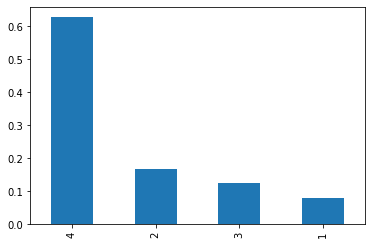

In [748]:
# This graph shows that dataset is imbalanced as 62.7% of data has target variable as 4

train_df.Target.value_counts(normalize=True).plot(kind='bar')
plt.show()

### Since its a Imbalanced Dataset "Accuracy" won't be a perfect performance metric

In [749]:
train_df.groupby(by=['idhogar']).parentesco1.sum().value_counts()

1    2973
0      15
Name: parentesco1, dtype: int64

In [750]:
train_df.groupby(by=['idhogar']).parentesco1.sum()

idhogar
001ff74ca    1
003123ec2    1
004616164    1
004983866    1
005905417    1
006031de3    1
006555fe2    1
00693f597    1
006b64543    1
00941f1f4    1
009ae1cec    1
00e3e05c5    1
00e443b00    1
00edc0d0f    1
0108c62b8    1
013962b12    1
013e9ee6a    1
0172ab1d9    1
0194d569d    1
01c6fcb6e    1
01d2e2b0b    1
01ff6a086    1
020713493    1
023edfed0    1
0250e0b59    1
027651991    1
029f3d736    1
02a3da971    1
02ae50d8f    1
02e9bb4e7    1
            ..
fdff0dc28    1
fe2384232    1
fe30320e4    1
fe30c653f    1
fe3c1f2dd    1
fe4251897    1
fe4c84768    1
fe4fe4ecc    1
fe521cbbe    1
fe5614212    1
fe7cdd65c    1
fe7dbf4cc    1
feb080b82    1
feb7c6365    1
fec89ef45    1
feccace39    1
fed4cd160    1
fed6bc0bd    1
fef7fd222    1
fef969ad9    1
ff250fd6c    1
ff31b984b    1
ff38ddef1    1
ff6d16fd0    1
ff703eed4    1
ff9343a35    1
ff9d5ab17    1
ffae4a097    1
ffe90d46f    1
fff7d6be1    1
Name: parentesco1, Length: 2988, dtype: int64

In [751]:
columns = train_df.columns

for col in columns:
    na = train_df[col].isnull().sum()
    if na > 0:
        print("Null value in feature: ",col,na)
        

Null value in feature:  v2a1 6860
Null value in feature:  v18q1 7342
Null value in feature:  rez_esc 7928
Null value in feature:  meaneduc 5
Null value in feature:  SQBmeaned 5


## Target variable does not have null values

# Cardinality check

In [752]:
feature = train_df.columns
cardinal = []
count = []


for feat in feature:
    card = len(train_df[feat].unique())
    if card > 2:
        cardinal.append(feat)
        count.append(card)   

In [553]:
cdl = pd.concat([pd.Series(cardinal),pd.Series(count)],axis=1)
cdl.sort_values(by=1,ascending=False,inplace =True)
cdl.shape     # Only 41 feature have cardinality later on will see if we have to do OHE or Label encoding 

(41, 2)

In [753]:
cdl

,0,1
0,Id,9557
18,idhogar,2988
1,v2a1,158
38,SQBmeaned,156
26,meaneduc,156
32,SQBage,97
30,age,97
39,agesq,97
28,overcrowding,38
36,SQBovercrowding,38


In [754]:
for feat in feature:
    card = len(train_df[feat].unique())
    if card < 2:
        print("Unique count : ", feat , card)

Unique count :  elimbasu5 1


In [755]:
train_df.elimbasu5.std() # Since it does not any variance and will not any value to model and will be removed later on

0.0

In [756]:
# Dropping columns which will not add any value
# dropping id  100% cardinality
# dropping v2a1 having 70% null value
# dropping v18q1 having 70% null value
# dropping rez_esc having 80% null value
# dropping elimbasu5 (std = 0)
df = train_df.drop(columns=['Id','v2a1','v18q1','rez_esc','elimbasu5'])

In [757]:
df.shape  # Shape reduced HURRAY :D

(9557, 138)

In [758]:
# Here we will get an overview about the dictribution of dataset
df.describe()

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,0.385895,1.559171,1.945066,0.399184,1.661714,2.060898,0.785079,3.220885,4.005964,3.999058,4.094590,7.200272,3.999058,0.594015,0.077744,0.188030,0.008580,0.115622,0.013079,0.001465,0.001465,0.692791,0.222873,0.000942,0.001046,0.016428,0.065920,0.970074,0.017683,0.003139,0.002197,0.677409,0.964738,0.031705,0.003558,0.885110,0.000314,0.002197,0.110809,0.003872,0.213979,0.764257,0.015381,0.002511,0.001883,0.489589,0.458407,0.050120,0.882704,0.03003,0.084545,0.001465,0.001256,0.102438,0.327404,0.570158,0.128388,0.288061,0.583551,0.101078,0.252799,0.646123,0.057549,0.483415,0.516585,0.137805,0.123260,0.268390,0.031914,0.062781,0.033169,0.342681,0.311081,0.184054,0.381814,0.012138,0.009522,0.051167,0.010045,0.002407,0.013289,0.003139,0.012661,0.008685,1.406613,2.592445,0.284085,3.999058,9.231523,0.134666,0.170556,0.207701,0.185414,0.112692,0.017893,0.015591,0.139793,0.015381,2.739981,1.605380,0.61850,0.100555,0.181647,0.017056,0.082243,0.102124,0.284608,0.975306,2.821492,0.587632,0.092707,0.062363,0.082767,0.0

## Null value treatment

In [759]:
df.fillna(df.median(),inplace=True)

In [760]:
# Verification that no null value exists
columns = df.columns

for col in columns:
    na = df[col].isnull().sum()
    if na > 0:
        print("Null value in feature: ",col,na)
        

In [761]:
# Here we notice that in below categorical variables we have number and strings both
l = ['edjefe','escolari','edjefa']
df[l].head()

,edjefe,escolari,edjefa
0,10,10,no
1,12,12,no
2,no,11,11
3,11,9,no
4,11,11,no


In [762]:
# Here we see as per data dictionary when the value comes out to be 1 then yes is present adn when 0 then no is present
k = ['dependency','hogar_nin','hogar_adul','hogar_mayor','hogar_total']
df[k].head()

,dependency,hogar_nin,hogar_adul,hogar_mayor,hogar_total
0,no,0,1,0,1
1,8,0,1,1,1
2,8,0,1,1,1
3,yes,2,2,0,4
4,yes,2,2,0,4


In [763]:
# replacing values yes --> 1 & no --> 0

df['dependency'] = df['dependency'].replace({'yes':1,'no':0})
df['edjefa'] = df['edjefa'].replace({'yes':1 , 'no':0})
df['edjefe'] = df['edjefe'].replace({'yes':1,'no':0})

In [764]:
df['dependency'] = df['dependency'].astype(float)
df['edjefa'] = df['edjefa'].astype(int)
df['edjefe'] = df['edjefe'].astype(int)

In [765]:
df.head(3)

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,0,3,0,1,1,0,0,1,1,0,0,0,0,1,1,1,1,10,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,0.0,10,0,10.0,0,0,0,1,0,0,0,0,0,1,1.0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.00,0.0,100.0,1849,4
1,0,4,0,1,1,1,0,1,1,0,0,0,0,1,1,1,1,12,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8.0,12,0,12.0,0,0,0,0,0,0,0,1,0,1,1.0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.00,64.0,144.0,4489,4
2,0,8,0,1,1,0,0,0,0,0,1,1,0,1,1,1,1,11,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8.0,0,11,11.0,0,0,0,0,1,0,0,0,0,2,0.5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.25,64.0,121.0,8464,4


# Transformation

##  Applying Label Encoder first because OHE does not work on string categorical data
#### LabelEncoder
#### OneHotEncoding

In [766]:
# We need only transformation applied to Categorical feature which is object type
# Creating masking to ensure only categorical feature are taken into consideration
cat_mask = df.dtypes == object
cat_cols = df.columns[cat_mask].tolist()
cat_cols

['idhogar']

In [767]:
# Instantiating  Label Encoder
le = LabelEncoder()

In [768]:
le.fit(df[cat_cols])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [769]:
df[cat_cols] = df[cat_cols].apply( lambda col: le.transform(df[cat_cols]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [770]:
df[cat_cols] = df[cat_cols].astype(object) # The dtype got chnaged so reverting back to object type

In [771]:
# Ensuring mask is at place
mask = df.dtypes == object
cat_cols = df.columns[mask].tolist()
cat_cols

['idhogar']

## Applying OHE due to below reasons:
#### 1. "idhogar" do not have linear relation with Target variable
#### 2. In other words closeness in "idhogar" does not indicate closeness in Target Variable

In [772]:
# Instantiating  One Hot Encoder
ohe = OneHotEncoder(handle_unknown='error',drop='first',categories='auto')

In [773]:
ohe.fit(df[cat_cols])

OneHotEncoder(categorical_features=None, categories='auto', drop='first',
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [774]:
ch = ohe.transform(df[cat_cols]).toarray()

In [775]:
# Converting ffrom array to Dataframe
feature_ohe = pd.DataFrame(ch)

In [776]:
# combining the OHE dataset and original dataset as Model considers only numeric data

sec = df.drop(columns=['idhogar']).reset_index()
feature_ohe = feature_ohe.reindex(feature_ohe.index)
final = pd.concat([sec,feature_ohe],axis=1,join='inner')

In [777]:
final.shape,sec.shape,feature_ohe.shape

((9557, 3125), (9557, 138), (9557, 2987))

In [778]:
final.loc[:,final.columns != 'Target'].head()

index  hacdor  rooms  hacapo  v14a  refrig  v18q  r4h1  r4h2  r4h3  r4m1  \
0      0       0      3       0     1       1     0     0     1     1     0   
1      1       0      4       0     1       1     1     0     1     1     0   
2      2       0      8       0     1       1     0     0     0     0     0   
3      3       0      5       0     1       1     1     0     2     2     1   
4      4       0      5       0     1       1     1     0     2     2     1   

   r4m2  r4m3  r4t1  r4t2  r4t3  tamhog  tamviv  escolari  hhsize  \
0     0     0     0     1     1       1       1        10       1   
1     0     0     0     1     1       1       1        12       1   
2     1     1     0     1     1       1       1        11       1   
3     1     2     1     3     4       4       4         9       4   
4     1     2     1     3     4       4       4        11       4   

   paredblolad  paredzocalo  paredpreb  pareddes  paredmad  paredzinc  \
0            1            0          0         0         0          0   
1            0            0          0         0         1          0   
2            0            0          0         0         1          0   
3            1            0          0         0         0          0   
4            1            0          0         0         0          0   

   paredfibras  paredother  pisomoscer  pisocemento  pisoother  pisonatur  \
0            0           0           1            0          0          0   
1            0           0           0            0          0          0   
2            0           0           1            0          0          0   
3            0           0           1            0          0          0   
4            0           0           1            0          0          0   

   pisonotiene  pisomadera  techozinc  techoentrepiso  techocane  techootro  \
0            0           0          0               1          0          0   
1            0           1          1               0          0          0   
2            0           0          1               0          0          0   
3            0           0          1               0          0          0   
4            0           0          1               0          0          0   

   cielorazo  abastaguadentro  abastaguafuera  abastaguano  public  planpri  \
0          1                1               0            0       1        0   
1          1                1               0            0       1        0   
2          1                1               0            0       1        0   
3          1                1               0            0       1        0   
4          1                1               0            0       1        0   

   noelec  coopele  sanitario1  sanitario2  sanitario3  sanitario5  \
0       0        0           0           1           0           0   
1       0        0           0           1           0           0   
2       0        0           0           1           0           0   
3       0        0           0           1           0           0   
4       0        0           0           1           0           0   

   sanitario6  energcocinar1  energcocinar2  energcocinar3  energcocinar4  \
0           0              0              0              1              0   
1           0              0              1              0              0   
2           0              0              1              0              0   
3           0              0              1              0              0   
4           0              0              1              0              0   

   elimbasu1  elimbasu2  elimbasu3  elimbasu4  elimbasu6  epared1  epared2  \
0          1          0          0          0          0        0        1   
1          1          0          0          0          0        0        1   
2          1          0          0          0          0        0        1   
3          1          0          0          0          0        0

# Train Test Split

In [779]:
# Seprating Feature and target variables in X & Y
# Splitting the dataset in 70:30 train:test ratio
X = final.loc[:,final.columns != 'Target']
y = final['Target']

x_train , x_test , y_train , y_test = train_test_split(X,y,test_size = 0.3,random_state= 42)

In [780]:
# Shape of all splits for verification
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((6689, 3124), (2868, 3124), (6689,), (2868,))

# PCA
##  Need to perform dimensionality reduction as we have 3124 x-variables

In [781]:
pca = PCA(n_components=3)

In [782]:
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [783]:
pca.explained_variance_ratio_

array([0.564248  , 0.43422917, 0.00095517])

In [784]:
pca.explained_variance_

array([7730695.68330085, 5949322.90855202,   13086.73164613])

In [785]:
x_train_pca = pca.transform(x_train)

# Tree-Based Model
### Random-Forest Classifier

In [786]:
# Instantiating Random forest classifier
rfc = RandomForestClassifier()

In [787]:
rfc.fit(x_train_pca,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [788]:
y_train_pred = rfc.predict(x_train_pca) # Predicting training dataset

In [789]:
accuracy_score(y_train,y_train_pred)   # Accuracy in Training 

0.9838540888025116

In [790]:
f1_score(y_train,y_train_pred,average=None)    # F1 score in training dataset

array([0.9754179 , 0.97674419, 0.97174447, 0.98905496])

# Model performance in test dataset

In [791]:
x_test_pca = pca.transform(x_test) # Appliying same transformation to test

In [792]:
y_test_pred = rfc.predict(x_test_pca)

In [793]:
accuracy_score(y_test,y_test_pred)    # Accuarcy in Test

0.6143654114365411

In [794]:
f1_score(y_test,y_test_pred,average=None)  # F1 score in test

array([0.24378109, 0.28950543, 0.23076923, 0.77650648])

# Cross Validation

#### Below are Current Parameters for Random Forest Classifier

In [795]:
rfc.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [796]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       0.31      0.20      0.24       244
           2       0.34      0.25      0.29       472
           3       0.34      0.17      0.23       380
           4       0.71      0.86      0.78      1772

    accuracy                           0.61      2868
   macro avg       0.42      0.37      0.39      2868
weighted avg       0.56      0.61      0.58      2868



# Cross Validation & Identifying the best parms 

In [797]:
# Getting Cross Validation score for rfc model
rfc_cv_score = cross_val_score(rfc, x_test_pca, y_test, cv=5,scoring='accuracy')
rfc_cv_score.mean()

0.586464373019802

In [798]:
# Getting arrays ready for parms
[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

In [800]:

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 600, num = 11)]
max_depth.append(None)

# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid,
                                n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)


In [801]:
# Fit the model
rfc_random.fit(x_train_pca, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 20.3min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=None,
  

In [802]:
# print results
print(rfc_random.best_params_)

{'n_estimators': 800, 'max_features': 'sqrt', 'max_depth': 250}


In [815]:
## now using best parms in rfc
rfc_cv = RandomForestClassifier(n_estimators=800,max_features='sqrt',max_depth=250)

rfc_cv.fit(x_train_pca,y_train)
y_test_pred = rfc_cv.predict(x_test_pca)

In [816]:
y_train_pred = rfc_cv.predict(x_train_pca)
accuracy_score(y_train,y_train_pred) # Accuracy in train

1.0

In [817]:
accuracy_score(y_test,y_test_pred) # Accuracy in test

0.6370292887029289

In [818]:
f1_score(y_train,y_train_pred,average=None)  # F1 score in train

array([1., 1., 1., 1.])

In [819]:
f1_score(y_test,y_test_pred,average=None)  # F1 score in test

array([0.26512968, 0.26490066, 0.19762846, 0.79021318])

In [820]:
print(classification_report(y_train,y_train_pred)) # Training report

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       511
           2       1.00      1.00      1.00      1125
           3       1.00      1.00      1.00       829
           4       1.00      1.00      1.00      4224

    accuracy                           1.00      6689
   macro avg       1.00      1.00      1.00      6689
weighted avg       1.00      1.00      1.00      6689



In [821]:
print(classification_report(y_test, y_test_pred)) # testing report

              precision    recall  f1-score   support

           1       0.45      0.19      0.27       244
           2       0.35      0.21      0.26       472
           3       0.40      0.13      0.20       380
           4       0.69      0.92      0.79      1772

    accuracy                           0.64      2868
   macro avg       0.47      0.36      0.38      2868
weighted avg       0.58      0.64      0.58      2868



In [822]:
# CVS after using best parms
cvs = cross_val_score(rfc_cv, x_train_pca, y_train, cv=5,scoring='accuracy')
cvs.mean() 

0.6368658328643904

In [810]:
# checking bias and distribution of dataset
y.value_counts(normalize=True)

4    0.627394
2    0.167103
3    0.126504
1    0.079000
Name: Target, dtype: float64

In [813]:
y_train.value_counts(normalize=True)

4    0.631485
2    0.168187
3    0.123935
1    0.076394
Name: Target, dtype: float64

In [814]:
y_test.value_counts(normalize=True)

4    0.617852
2    0.164575
3    0.132497
1    0.085077
Name: Target, dtype: float64

# Conclusion

#### RFC models perform very good in training but fails in test dataset i.e. overfitting
#### Base accuarcy model is 62% and our model is only 63.7% accuarcy
#### Since dataset provided is not balanced: Accuarcy is not a good performance metric OR need to collect more samples from other target to make balanced dataset
#### After using  best Parms CVS increased from 58.6 to 63.6 %

# Thank You